<a href="https://colab.research.google.com/github/Senoirpro/Product-recommendation-for-e-commerce/blob/main/recommend_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/Dataset/DatafinitiElectronicsProductData.csv')

In [ ]:
df1 = df.dropna()
df1.shape

(1733, 27)

In [ ]:
df1.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [ ]:
df1.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [ ]:
df2 = df1.drop(columns=[ 'id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful','reviews.sourceURLs', 'reviews.text', 'reviews.title',
        'sourceURLs', 'upc', 'weight'])

In [ ]:
df2.head()

,name,reviews.rating,reviews.username
0,Microsoft Surface Pro 4 Type Cover with Finger...,5.0,JNH1
1,Microsoft Surface Pro 4 Type Cover with Finger...,4.0,Appa
2,Microsoft Surface Pro 4 Type Cover with Finger...,4.0,Kman
3,Microsoft Surface Pro 4 Type Cover with Finger...,5.0,UpstateNY
4,Microsoft Surface Pro 4 Type Cover with Finger...,5.0,Glickster


In [ ]:
df2['reviews.username'].unique().shape

(1616,)

In [ ]:
df2['name'].unique()

array(['Microsoft Surface Pro 4 Type Cover with Fingerprint ID', 'Alpine',
       'NS-SP1800BL 5.1-Channel Home Theater System (Black)',
       'Motorola Wi-Fi Pet Video Camera',
       'AW6500 All-Weather Outdoor Speaker (White, Single)',
       'Logitech 915-000224  Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black'],
      dtype=object)

In [ ]:
df2['name'].unique().shape

(6,)

In [ ]:
popular_products = pd.DataFrame(df2.groupby('name')['reviews.rating'].count())
most_popular = popular_products.sort_values('reviews.rating', ascending=False)
most_popular.head(10)

,reviews.rating
name,
Logitech 915-000224 Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black,1003
Microsoft Surface Pro 4 Type Cover with Fingerprint ID,426
Alpine,112
"AW6500 All-Weather Outdoor Speaker (White, Single)",108
NS-SP1800BL 5.1-Channel Home Theater System (Black),63
Motorola Wi-Fi Pet Video Camera,21


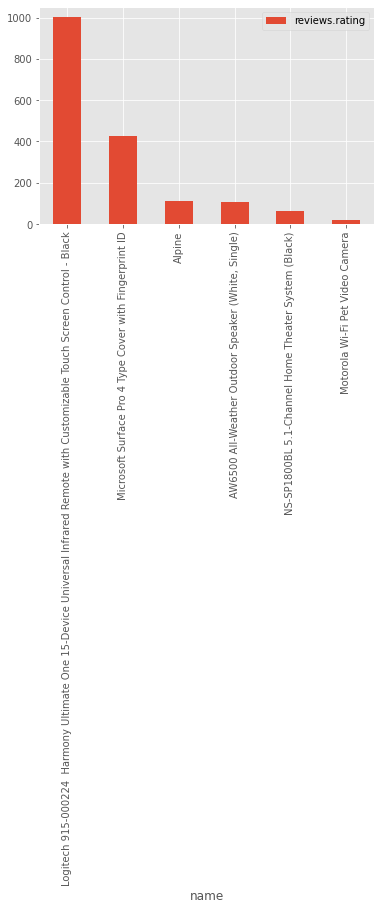

In [ ]:
most_popular.head(30).plot(kind = "bar")

In [ ]:
ratings_utility_matrix = df2.pivot_table(values='reviews.rating', index='reviews.username', columns='name', fill_value=0)
ratings_utility_matrix.head()

name,"AW6500 All-Weather Outdoor Speaker (White, Single)",Alpine,Logitech 915-000224 Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black,Microsoft Surface Pro 4 Type Cover with Fingerprint ID,Motorola Wi-Fi Pet Video Camera,NS-SP1800BL 5.1-Channel Home Theater System (Black)
reviews.username,,,,,,
12packmax,0.0,0.0,1.0,0.0,0,0
232323,0.0,0.0,0.0,5.0,0,0
23322,5.0,0.0,0.0,0.0,0,0
2k9gxp,0.0,0.0,5.0,0.0,0,0
422520,0.0,0.0,4.0,0.0,0,0


In [ ]:
ratings_utility_matrix.shape

(1616, 6)

In [ ]:
X = ratings_utility_matrix.T
X.head()

reviews.username,12packmax,232323,23322,2k9gxp,422520,456321,4781rj,7777,A199578,AB33,...,wolfram,wsgjr,xc1097,xman,xxclusivxx,xyxy2,yaya,yoda37,yourkidding,zilla
name,,,,,,,,,,,,,,,,,,,,,
"AW6500 All-Weather Outdoor Speaker (White, Single)",0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alpine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Logitech 915-000224 Harmony Ultimate One 15-Device Universal Infrared Remote with Customizable Touch Screen Control - Black,1.0,0.0,0.0,5.0,4.0,3.0,0.0,5.0,0.0,5.0,...,0.0,5.0,0.0,4.0,0.0,5.0,5.0,0.0,5.0,2.0
Microsoft Surface Pro 4 Type Cover with Fingerprint ID,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,5.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0
Motorola Wi-Fi Pet Video Camera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(6, 1616)

In [ ]:
X1 = X

decompose matrix

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(6, 6)

coorelation

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(6, 6)

In [ ]:
X.index[4]

'Motorola Wi-Fi Pet Video Camera'

In [ ]:
i = "Motorola Wi-Fi Pet Video Camera"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

4

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(6,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

[]

[more](https://github.com/RudrenduPaul/Python-Ecommerce-recommendation-system-using-machine-learning/blob/master/Recommendation%20System%20-%20Paul.ipynb)